In [1]:
from nmon import *

In [2]:
# EJM_list[4], EJN_list[22], flux_list[1]

EJM_list[4], EJN_list[22], flux_list[1]

nmon.flag_calc_transitions = False
nmon [17.80912227 21.42880951 21.51986088 24.95235842 25.0383522  28.2647849 ] - 0.5, 0.0
[3.6196872473597175, 0.0910513651932554]

nmon [-8.43438181 -4.81137902 -1.38895472  1.80948453  4.75990402  7.30212781] - 0.5, 0.5
[3.6230027936536535, 3.4224242990380596]

nmon.flag_calc_transitions = True
nmon [17.80912227 21.42880951 21.51986088 24.95235842 25.0383522  28.2647849 ] - 0.5, 0.0
[3.7107386125522552, 3.5184913251490713]

nmon [-8.43438181 -4.81137902 -1.38895472  1.80948453  4.75990402  7.30212781] - 0.5, 0.5
[3.623002793653722, 3.422424299037308]

nmon [ 2.84556894  7.94480077 12.85517246 17.56679519 22.07180158 26.36398162]


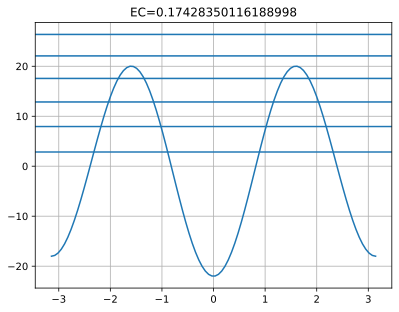

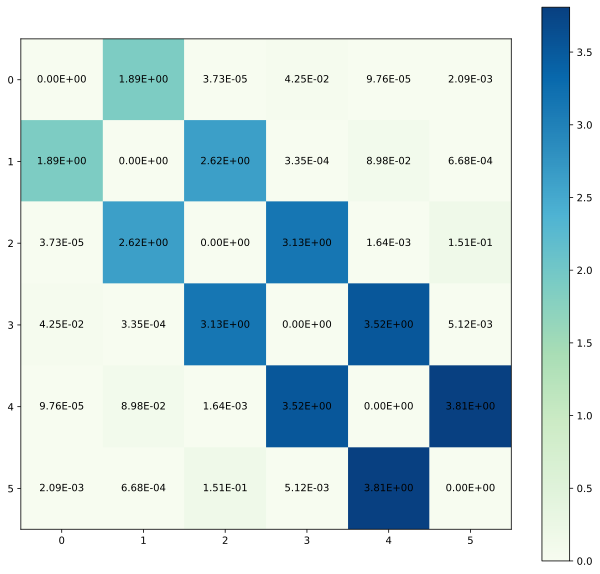

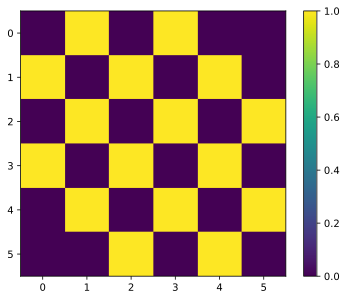

[np.float64(5.099231825698579), np.float64(4.910371695517554), np.float64(4.711622725690523), np.float64(4.505006393932614), np.float64(4.292180034914633)]
[ 2.84556894  7.94480077 12.85517246 17.56679519 22.07180158 26.36398162]
-0.03703697667347215


In [3]:
N = 1
M = 2
EC_shunt = 0.18 * 1

EJ_EC = 1

nmon = Nmon(N=N, M=M, EJN=20, EJM=1, EC_shunt=EC_shunt)
nmon.flag_calc_transitions = True
nmon.hamiltonian_calc(flux=0.0, ng=[0.2, 0.5], num_levels=6, make_plot=True, just_H=False, cutoff=7)
                    #    cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total))
print(nmon.transition_freqs)
print(nmon.bound_state_energies)
print(nmon.relative_anharm)


In [4]:
nmon.sym_hamiltonian

(225.174284*n1**2 + 225.174284*n2**2 + 225.174284*n_g1**2 + 225.174284*n_g2**2 + 450.348567*n1*n_g1 + 450.348567*n2*n_g2 - 449.651433*n1*n2 - 449.651433*n1*n_g2 - 449.651433*n2*n_g1 - 449.651433*n_g1*n_g2) + (-1.0*cos(θ1) - 1.0*cos((2πΦ_{1}) - θ2) - 20.0*cos(θ1 + θ2))

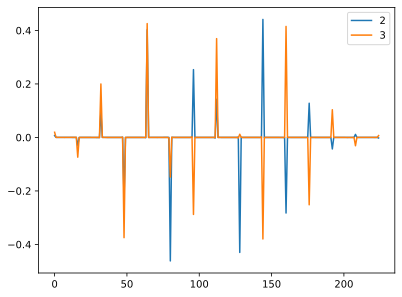

In [5]:
plt.plot(nmon.evecs[:, 1], label='2')
plt.plot(nmon.evecs[:, 2], label='3')
# plt.plot(nmon.dH_dng.flatten())
plt.legend()
plt.show()

In [6]:
Matr = nmon.nmon_circ.transformation_matrix
Matr_inv = np.linalg.inv(Matr)
Matr, Matr_inv, nmon.sym_hamiltonian

(array([[1, 1],
        [1, 0]]),
 array([[ 0.,  1.],
        [ 1., -1.]]),
 (-1.0*cos(θ1) - 1.0*cos((2πΦ_{1}) - θ2) - 20.0*cos(θ1 + θ2)) + (225.174284*n1**2 - 449.651433*n1*n2 + 450.348567*n1*n_g1 - 449.651433*n1*n_g2 + 225.174284*n2**2 - 449.651433*n2*n_g1 + 450.348567*n2*n_g2 + 225.174284*n_g1**2 - 449.651433*n_g1*n_g2 + 225.174284*n_g2**2))

In [7]:
eval, evec = spla.eigsh(nmon.H, which='SA')
eval

array([ 2.84556894,  7.94480077, 12.85517246, 17.56679519, 22.07180158,
       26.36398162])

In [8]:
eval, evec = tf.linalg.eigh(nmon.H_arr)
eval[:6]

<tf.Tensor: shape=(6,), dtype=float64, numpy=
array([ 2.84556894,  7.94480077, 12.85517246, 17.56679519, 22.07180158,
       26.36398162])>

array([-15.53501576, -10.6976434 ,  -6.05162713,  -1.61088792,
         2.60657678,   6.5772256 ])>

In [9]:
nmon.sym_hamiltonian

(225.174284*n1**2 + 225.174284*n2**2 + 225.174284*n_g1**2 + 225.174284*n_g2**2 + 450.348567*n1*n_g1 + 450.348567*n2*n_g2 - 449.651433*n1*n2 - 449.651433*n1*n_g2 - 449.651433*n2*n_g1 - 449.651433*n_g1*n_g2) + (-1.0*cos(θ1) - 1.0*cos((2πΦ_{1}) - θ2) - 20.0*cos(θ1 + θ2))

In [10]:
nmon.nmon_circ.transformation_matrix, nmon.theta_coefs

(array([[1, 1],
        [1, 0]]),
 array([1., 1.]))

In [11]:
# size = nmon.H.shape[0]
# nmon.H = np.real(nmon.H)
# for i in range(size):
#     for j in range(size):
#         print(round(nmon.H[i,j], 2), end=' ')
#         pass
#     print()

In [12]:
# import numpy as np

# def construct_hamiltonian(n_cut, Phi_1=0.0, n_g1=0.0, n_g2=0.0):
#     # Define the basis states
#     basis = []
#     for n1 in range(-n_cut, n_cut + 1):
#         for n2 in range(-n_cut, n_cut + 1):
#             basis.append((n1, n2))
    
#     # Map basis states to indices
#     n1n2_to_index = { (n1, n2): idx for idx, (n1, n2) in enumerate(basis) }
    
#     # Initialize the Hamiltonian matrix
#     dim = len(basis)
#     H = np.zeros((dim, dim), dtype=complex)
    
#     # Constants from the Hamiltonian
#     E_n1_n1 = 125.174717 # TODO precision?
#     E_n1_n2 = -249.650567
#     E_n1_ng1 = 250.349433
#     E_n1_ng2 = -249.650567
#     E_n2_n2 = 125.174717
#     E_n2_ng1 = -249.650567
#     E_n2_ng2 = 250.349433
#     E_ng1_ng1 = 125.174717
#     E_ng1_ng2 = -249.650567
#     E_ng2_ng2 = 125.174717
    
#     # Charging energy terms (diagonal)
#     for idx, (n1, n2) in enumerate(basis):
#         H_c = (
#             E_n1_n1 * (n1 - n_g1)**2 +
#             E_n2_n2 * (n2 - n_g2)**2 +
#             E_n1_n2 * (n1 - n_g1) * (n2 - n_g2)
#         )
#         H[idx, idx] = H_c
    
#     # Potential energy terms (off-diagonal)
#     # V1: -1.8 * cos(θ1)
#     for idx, (n1, n2) in enumerate(basis):
#         coeff = -0.9  # -1.8 / 2
#         for delta_n1 in [-1, 1]:
#             n1p = n1 + delta_n1
#             n2p = n2
#             if -n_cut <= n1p <= n_cut:
#                 idxp = n1n2_to_index.get((n1p, n2p))
#                 if idxp is not None:
#                     H[idx, idxp] += coeff
    
#     # V2: -1.8 * cos((2πΦ_1) - θ2)
#     phi = 2 * np.pi * Phi_1
#     exp_plus = np.exp(-1j * phi)
#     exp_minus = np.exp(1j * phi)
#     for idx, (n1, n2) in enumerate(basis):
#         coeff = -0.9
#         # First term: n2 -> n2 + 1
#         n1p = n1
#         n2p = n2 + 1
#         if -n_cut <= n2p <= n_cut:
#             idxp = n1n2_to_index.get((n1p, n2p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff * exp_plus
#         # Second term: n2 -> n2 - 1
#         n2p = n2 - 1
#         if -n_cut <= n2p <= n_cut:
#             idxp = n1n2_to_index.get((n1p, n2p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff * exp_minus
    
#     # V3: -18.0 * cos(θ1 + θ2)
#     for idx, (n1, n2) in enumerate(basis):
#         coeff = -9.0  # -18.0 / 2
#         # First term: n1 -> n1 + 1, n2 -> n2 + 1
#         n1p = n1 + 1
#         n2p = n2 + 1
#         if -n_cut <= n1p <= n_cut and -n_cut <= n2p <= n_cut:
#             idxp = n1n2_to_index.get((n1p, n2p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff
#         # Second term: n1 -> n1 - 1, n2 -> n2 - 1
#         n1p = n1 - 1
#         n2p = n2 - 1
#         if -n_cut <= n1p <= n_cut and -n_cut <= n2p <= n_cut:
#             idxp = n1n2_to_index.get((n1p, n2p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff
    
#     # Ensure the Hamiltonian is Hermitian
#     H = (H + H.conj().T) / 2
#     return H.real  # Return the real part

# # Example usage
# n_cut = 3  # Charge basis cutoff
# Phi_1 = 0.0  # External flux Φ_1 in units of Φ/Φ0
# n_g1 = 0.0  # Offset charge n_g1
# n_g2 = 0.0  # Offset charge n_g2

# hamiltonian_matrix = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2)
# print(np.round(hamiltonian_matrix, 2))

# # Solve eigenvalue problem
# eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_matrix)
# print("Eigenvalues:", sorted(eigenvalues))

# # Compute the ratio as requested
# max_diag = np.max(np.diag(hamiltonian_matrix))
# size = hamiltonian_matrix.shape[0]
# off_diag_element = hamiltonian_matrix[0, 1]
# ratio = max_diag / size**2 / off_diag_element
# print("Computed Ratio:", ratio)


In [13]:
# size = hamiltonian_matrix.shape[0]
# hamiltonian_matrix = np.real(hamiltonian_matrix)
# for i in range(size):
#     for j in range(size):
#         print(round(hamiltonian_matrix[i,j], 2), end=' ')
#         pass
#     print()

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# import sympy as sp

# # Define the symbolic variables
# theta_variables = []
# n_variables = []
# ng_variables = []

# for i in range(1, nmon.N + nmon.M):
#     theta_variables.append(sp.symbols(f'θ{i}'))
#     n_variables.append(sp.symbols(f'n{i}'))
#     ng_variables.append(sp.symbols(f'n_g{i}'))

# _2pi_Phi1 = sp.symbols('(2πΦ_{1})')

# flux_list = np.linspace(0, 0.5, 10)

# for flux in flux_list:

#     # Define the Hamiltonian
#     hamiltonian = nmon.sym_hamiltonian

#     # Substitute n1, n2, n_g1, n_g2 with 0 as per user request
#     hamiltonian = hamiltonian.subs({ni: 0 for ni in n_variables})
#     hamiltonian = hamiltonian.subs({n_gi: 0 for n_gi in ng_variables})
#     hamiltonian = hamiltonian.subs({_2pi_Phi1:2*np.pi*flux})

#     print(hamiltonian.free_symbols)

#     # Check if one or two theta variables are present for plotting
#     def plot_hamiltonian(hamiltonian_expr, theta_vars):
#         if len(theta_vars) == 1:
#             theta = theta_vars[0]
#             theta_vals = np.linspace(-np.pi, np.pi, 50)
#             potential_vals = np.array([hamiltonian_expr.subs(theta, val).evalf() for val in theta_vals], dtype=float)
            
#             plt.figure(figsize=(8, 6))
#             plt.plot(theta_vals, potential_vals, label=f'Potential vs {theta}')
#             plt.xlabel(f'{theta} (radians)')
#             plt.ylabel('Potential Energy')
#             plt.title(f'1D Potential Energy Plot, Phi={flux}')


#             for eval in nmon.bound_state_energies:
#                 plt.axhline(eval)
                
#             plt.grid(True)
#             plt.legend()
#             plt.show()
#         elif len(theta_vars) == 2:

#             theta1_vals = np.linspace(-2*np.pi, 2*np.pi, 50)
#             theta2_vals = np.linspace(-2*np.pi, 2*np.pi, 50)
#             theta1_mesh, theta2_mesh = np.meshgrid(theta1_vals, theta2_vals)
            
#             potential_vals = np.array([[hamiltonian_expr.subs({theta_vars[0]: t1, theta_vars[1]: t2}).evalf()
#                                         for t1 in theta1_vals] for t2 in theta2_vals], dtype=float)

#             plt.figure(figsize=(10, 8))

#             plt.plot(theta1_vals, -2*theta1_vals)
#             plt.contourf(theta1_mesh, theta2_mesh, potential_vals, levels=50, cmap='viridis')
#             # plt.imshow(potential_vals)
#             plt.colorbar(label='Potential Energy')
#             plt.xlabel(f'{theta_vars[0]} (radians)')
#             plt.ylabel(f'{theta_vars[1]} (radians)')
#             plt.title(f'2D Potential Energy Plot, Phi={flux}')
#             plt.grid(True)
#             plt.ylim(-2*np.pi, 2*np.pi)
#             plt.xlim(-2*np.pi, 2*np.pi)
#             plt.show()

#     plot_hamiltonian(hamiltonian, theta_variables)


In [15]:
# nmon.sym_hamiltonian

In [16]:
# nmon.H.shape[0]

In [17]:
# evals, evecs = np.linalg.eig(nmon.H)
# sorted(evals)

In [18]:
# # TODO do decomposition with corresponding elements of EC matrix and EJ

# y = lambda x: np.exp(-np.abs(1 - x) / (100-0)*(284-0) * 3 / 10**(1/4 * 1))
# psi0 = np.array([y(i) for i in range( 2*6+1 )])
# y1 = lambda x: np.exp(-np.abs(0 - x) / (100-0)*(284-0) * 3 / 10**(1/4 * 1))
# psi1 = np.array([y1(i) for i in range( 2*6+1 )])
# # psi0 = np.kron(psi0, psi1)
# psi0 = np.kron(psi1, psi0)
# # plt.plot(psi0.shape[0] - np.arange(psi0.shape[0]), np.abs(psi0))
# plt.plot(np.arange(psi0.shape[0]), np.abs(psi0))

# plt.plot(np.arange(evecs[:, 0].shape[0]), np.abs(evecs[:, 1]))
# plt.yscale('log')

In [19]:
# nmon.H @ psi0.

In [20]:
ng_probes = [0, 0.25, 0.5, 0.75]
ng_combinations = np.array(list(combinations_with_replacement(ng_probes, N + M - 1)))

ng_combinations

array([[0.  , 0.  ],
       [0.  , 0.25],
       [0.  , 0.5 ],
       [0.  , 0.75],
       [0.25, 0.25],
       [0.25, 0.5 ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 0.75],
       [0.75, 0.75]])

In [21]:
from nmon import *

EC_shunt = 0.18

N = 1
M = 2

N_EJN = 100
N_EJM = 100
N_flux = 5

flux_list = np.linspace(0, 0.5, N_flux)
EJN_list = np.linspace(1 * EC_shunt, 100 * EC_shunt, N_EJN)
EJM_list = np.linspace(1 * EC_shunt, 100 * EC_shunt, N_EJM)


# Generate all combinations of ng values
# ng_probes = [0, 0.25, 0.5, 0.75]
# ng_combinations = np.array(list(combinations_with_replacement(ng_probes, N + M - 1)))
ng_combinations = [
    [1., 0],
    [1-0.24, 0.24],
    [1-0.25, 0.25],
    [1-0.5, 0.5],
    
    # [1, 0.5],
    # [0, 0]
]

relative_anharm_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_list = np.full((N_EJM, N_EJN, N_flux), None)
w12_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_variation_list = np.full_like(w01_list, None)
w01_variation_list_precise = np.full_like(w01_list, None)

# To store the ng values corresponding to min and max w01
w01_ng_min = np.empty((N_EJM, N_EJN, N_flux), dtype=object)
w01_ng_max = np.empty((N_EJM, N_EJN, N_flux), dtype=object)

for i in range(N_EJM):
    for j in tqdm(range(N_EJN)):
        nmon = Nmon(N=N, M=M, EJM=EJM_list[i], EJN=EJN_list[j], EC_shunt=EC_shunt)
        for k, flux in enumerate(flux_list):

            w01_local = []
            local_ng_values = []
            local_relative_anharm = []
            local_w12 = []

            # Iterate over all ng combinations
            for ng in ng_combinations:
                try:
                    nmon.hamiltonian_calc(flux=flux, ng=ng, num_levels=6, make_plot=False, just_H=False,
                                        cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
                except Exception:
                    continue

                # Store w01 for the current ng
                w01_local.append(nmon.transition_freqs[0])
                local_ng_values.append(tuple(ng))

                if len(nmon.transition_freqs) > 1:
                    local_w12.append( nmon.transition_freqs[1])
                    local_relative_anharm.append(nmon.relative_anharm)


            try:
                EJM_idx, EJN_idx = np.where(nmon.H_arr[0] != 0)[0][1:][0], np.where(nmon.H_arr[0] != 0)[0][1:][-1]

                # np.absolute(max(np.diag(nmon.H_arr)) / nmon.H_arr.shape[0]**2 / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) )
                up_value = max(np.diag(nmon.H_arr)) / (nmon.H_arr.shape[0]**(1/3) - 1 )/2
                EJM_sum = M*nmon.H_arr[0, EJM_idx]
                EJN_sum = N*nmon.H_arr[0, EJN_idx] 

                # Compute relative anharmonicity
                # Calculate w01 variation and store ng values for min and max w01
                min_idx = np.argmin(np.abs(local_relative_anharm)) # worst case here!!!


                w01_list[i, j, k] = w01_local[min_idx]  # Store the minimal w01 for any ng configuration

                w12_list[i, j, k] = local_w12[min_idx]
                relative_anharm_list[i, j, k] = local_relative_anharm[min_idx]

                w01_variation_list[i, j, k] = (np.absolute( up_value / (EJM_sum)) / 2e4 + np.absolute( up_value / (EJN_sum)) / 2e4) / max(w01_local)
                w01_variation_list_precise[i, j, k] = (max(w01_local) - min(w01_local)) / max(w01_local)
                
                min_idx = np.argmin(w01_local)
                max_idx = np.argmax(w01_local)
                w01_ng_min[i, j, k] = local_ng_values[min_idx]
                w01_ng_max[i, j, k] = local_ng_values[max_idx]

            except Exception:
                continue

# At the end, w01_ng_min and w01_ng_max store the ng values for which w01 is minimal or maximal.
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJM_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJN_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), flux_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), relative_anharm_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w12_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w12_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list_precise)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_max)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_min)



100%|██████████| 100/100 [03:52<00:00,  2.32s/it]


### no need to vary flux!!! it just changes EJ

In [22]:
from nmon import *

N = 1
M = 2
EC_shunt = 0.18 * 1

EJ_EC = 1

nmon = Nmon(N=N, M=M, EJN=100*EJ_EC*EC_shunt, EJM=1*EJ_EC*EC_shunt, EC_shunt=EC_shunt)
nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0.0], num_levels=6, make_plot=True, just_H=True,
                      cutoff=18)
                    #    cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total))
# print(nmon.transition_freqs)
# print(nmon.bound_state_energies)
print(0)




EJM_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(N, M, round(EC_shunt, 2)))
EJN_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(N, M, round(EC_shunt, 2)))
flux_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
relative_anharm_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w12_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w12_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_precise = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_max_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_min_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)


0


In [23]:
w01_ng_max_pickle[-1, -1, 1]

(0.75, 0.25)

In [24]:
w01_variation_list_precise[4][22][1]

np.float64(0.029742769020227974)

In [25]:
EJM_list[4], EJN_list[22], flux_list[1]

(0.8999999999999999, 4.14, 0.125)

In [26]:
flux_list = np.array(flux_list, dtype=float)
relative_anharm_list_flux = np.array(relative_anharm_list_flux, dtype=float)
w01_list_flux = np.array(w01_list_flux, dtype=float)
w12_list_flux = np.array(w12_list_flux, dtype=float)
w01_variation_list_flux = np.array(w01_variation_list_flux, dtype=float)
w01_variation_list_precise = np.array(w01_variation_list_precise, dtype=float)

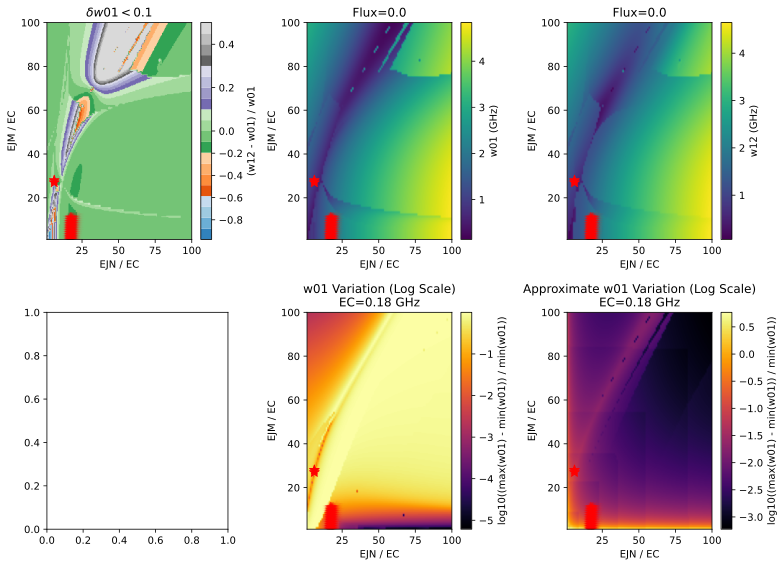

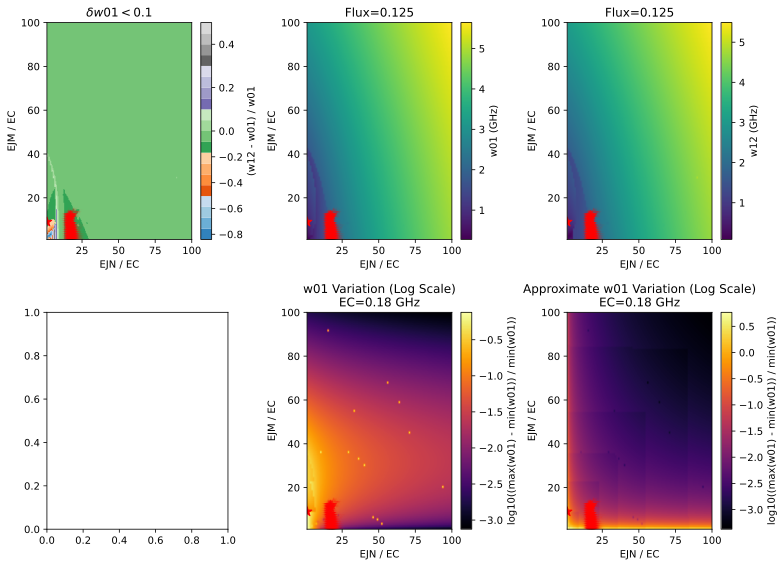

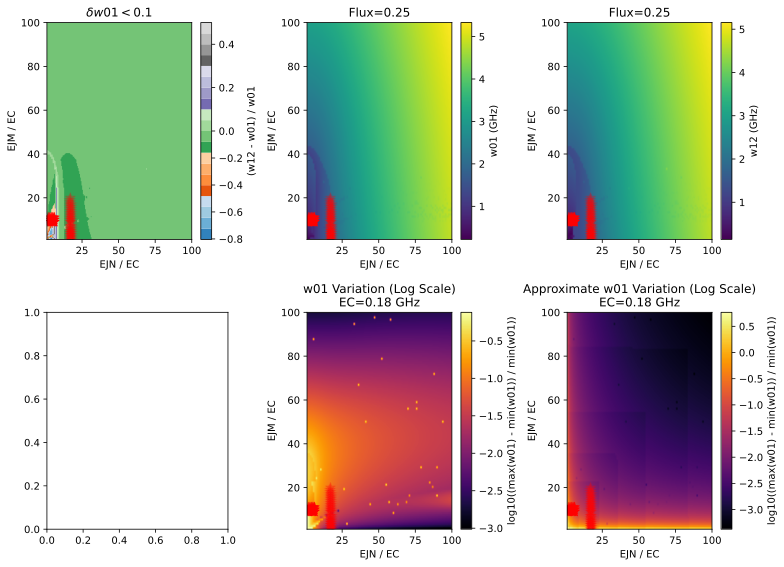

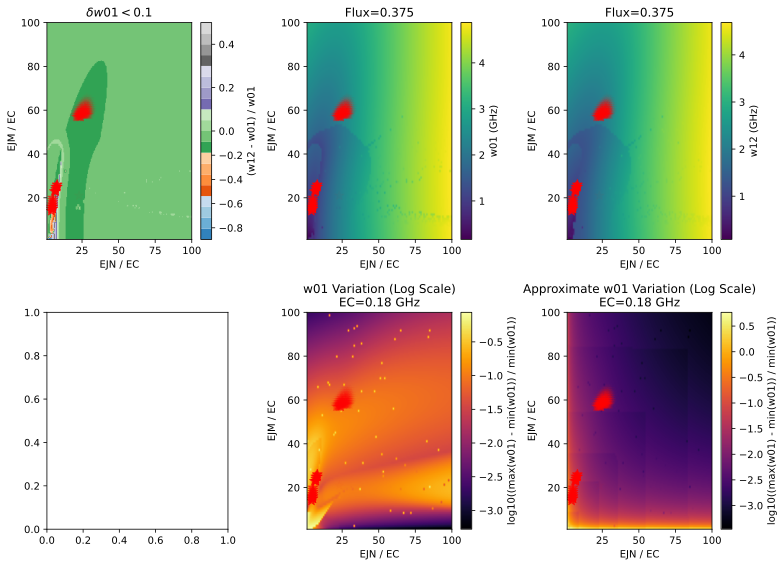

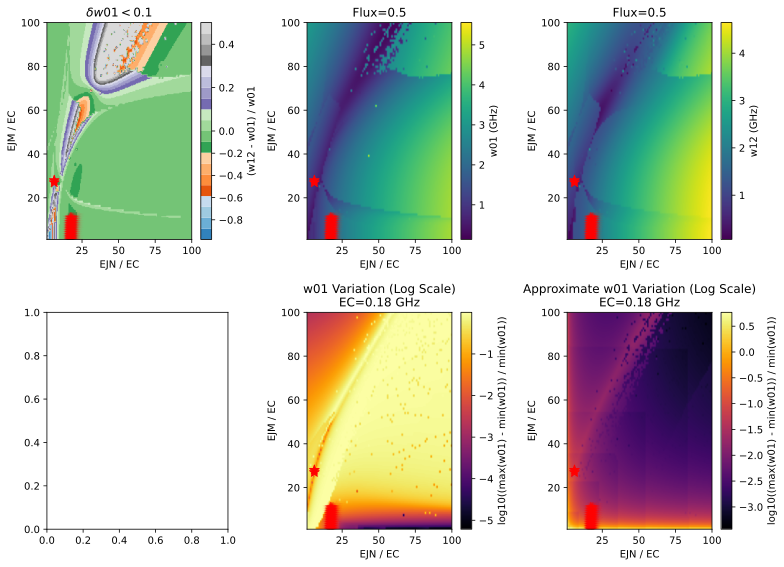

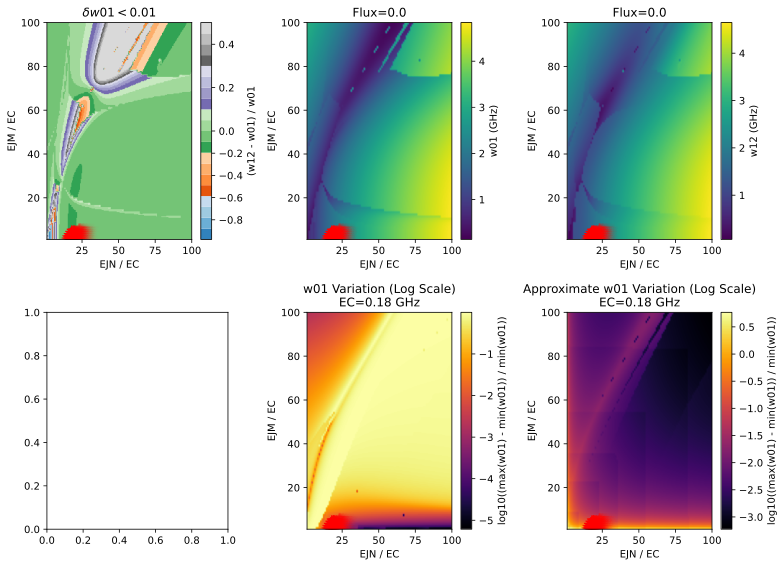

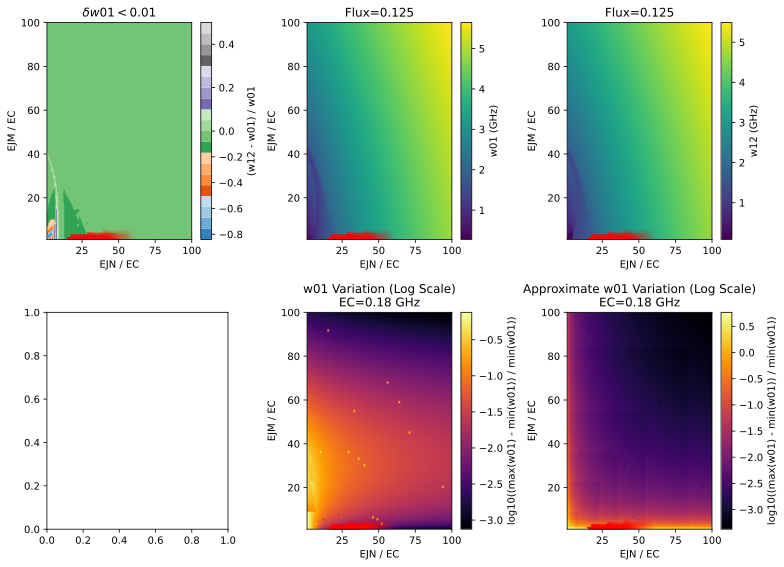

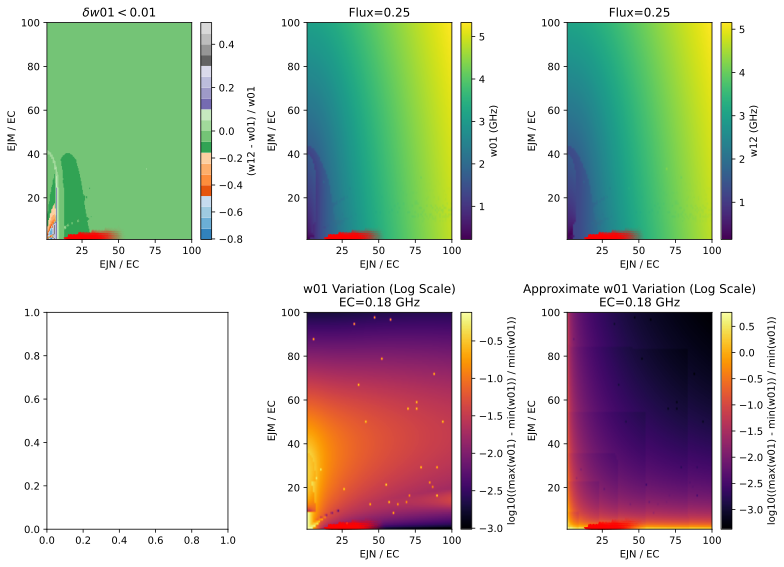

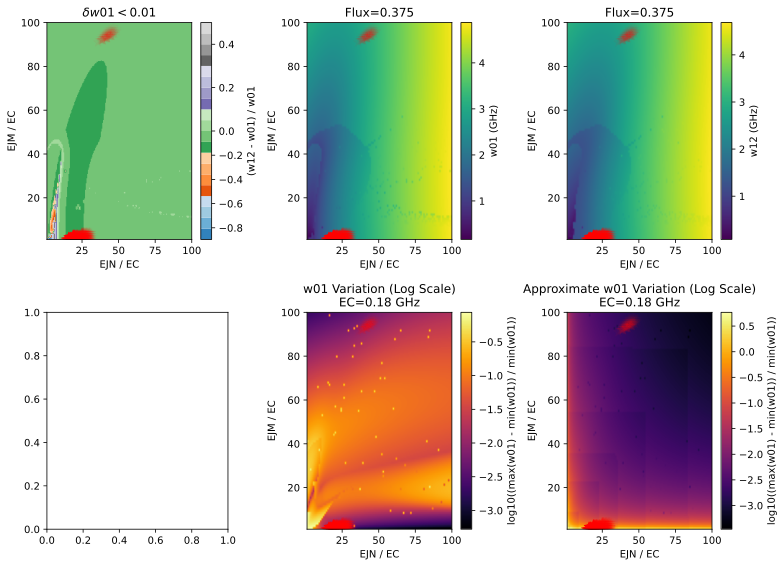

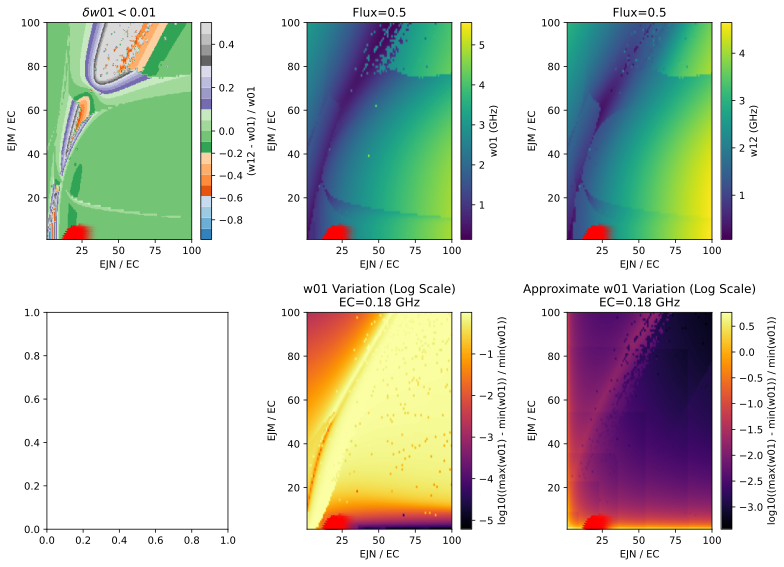

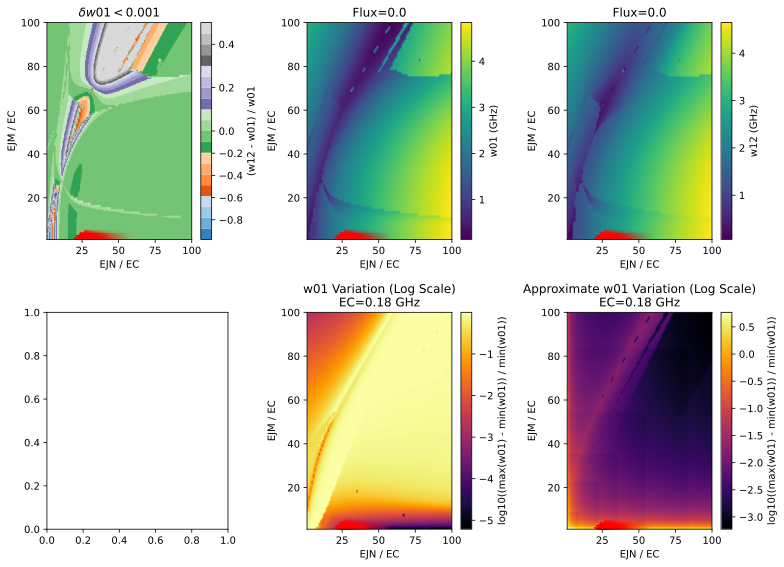

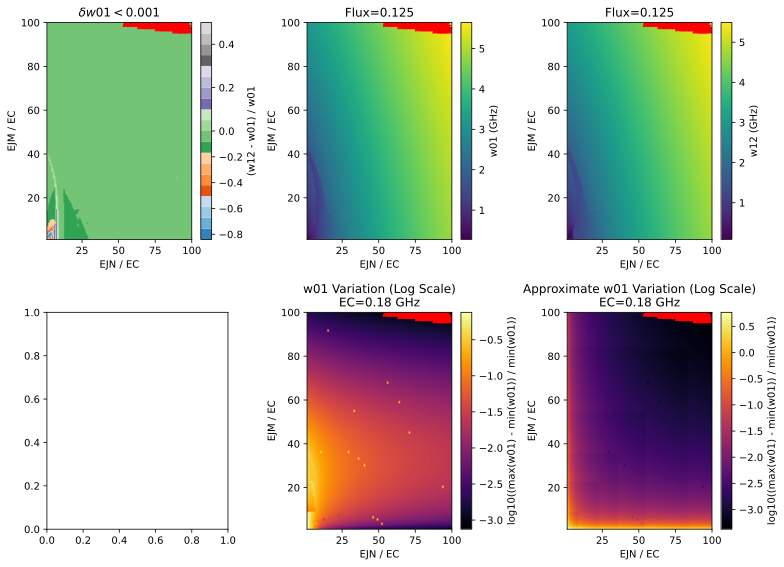

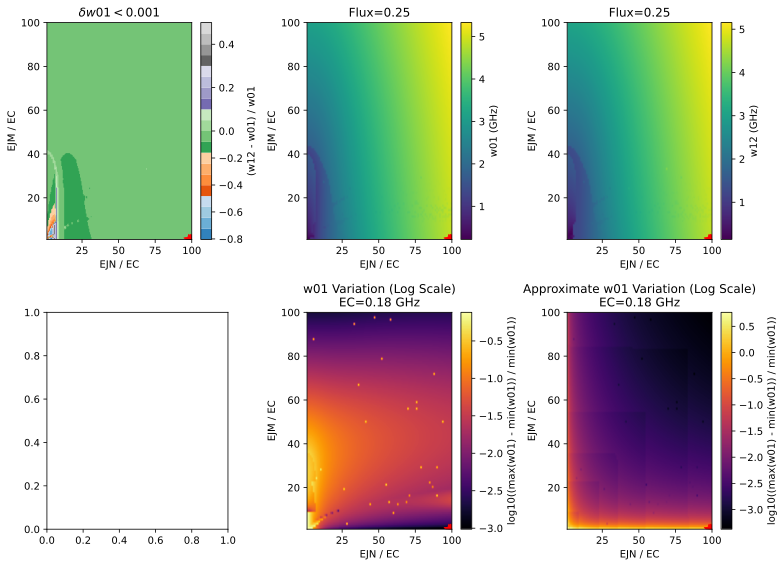

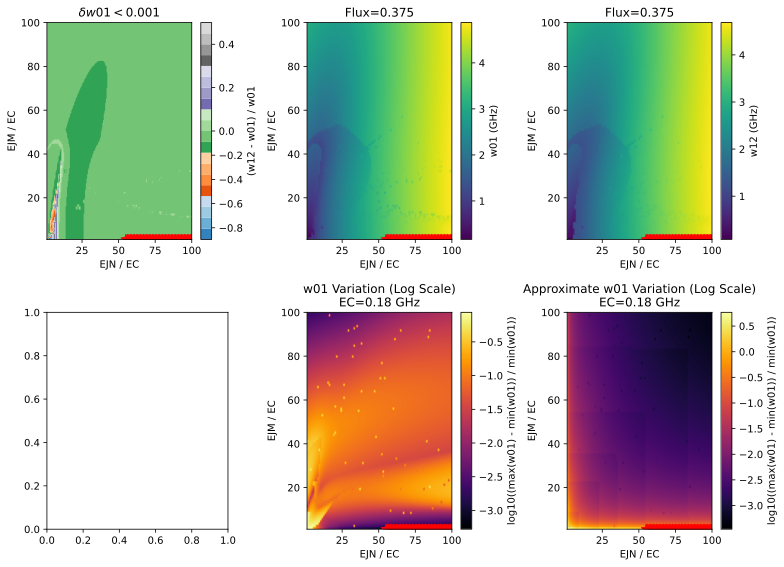

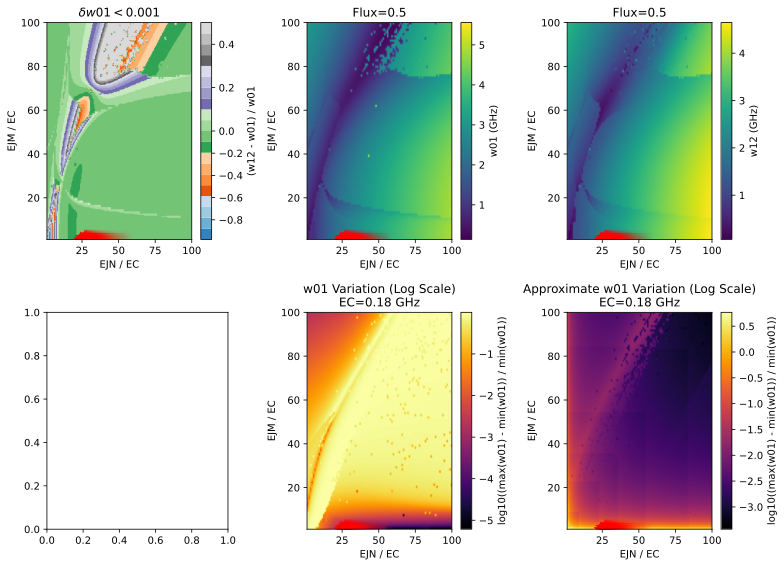

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

w01_variation_levels = [1e-1, 1e-2, 10**(-3)]

for w01_variation_lev in w01_variation_levels:

    for k, flux_value in enumerate(flux_list[:]):

        # k = flux_list.shape[0] - 1

        EJN_grid, EJM_grid = np.meshgrid(EJN_list, EJM_list)

        # Extract arrays for the current flux value
        relative_anharm_list = relative_anharm_list_flux[:, :, k]
        w01_list = w01_list_flux[:, :, k]
        w12_list = w12_list_flux[:, :, k]
        w01_variation_list = w01_variation_list_precise[:, :, k]

        # Replace NaN values in relative_anharm_list
        relative_anharm_list[np.isnan(relative_anharm_list)] = 1

        # Create DataFrame for all data points
        data = {
            'EJN': EJN_grid.flatten(),
            'EJM': EJM_grid.flatten(),
            'RelativeAnharmonicity': relative_anharm_list.flatten(),
            'w01': w01_list.flatten(),
            'w01Variation': w01_variation_list.flatten()
        }
        df = pd.DataFrame(data)

        # Filter rows where w01Variation < 10^(-1)
        filtered_df = df[df['w01Variation'] < w01_variation_lev]

        # Identify the top N_anharm points (lowest anharmonicity values)
        N_anharm = 100
        best_points = filtered_df.nsmallest(N_anharm, 'RelativeAnharmonicity')

        # Adjust alpha values for star-points
        best_anharm_values = best_points['RelativeAnharmonicity'].values
        
        N_anharm = best_anharm_values.shape[0]

        alphas = np.ones(N_anharm)
        for i in range(1, N_anharm):
            if abs(best_anharm_values[i] - best_anharm_values[i - 1]) > 1e-3:
                alphas[i:] = np.logspace(0, -2, N_anharm - i)
                break

        # Plot with imshow and overlay star-points
        fig, axes = plt.subplots(2, 3, figsize=(11, 8))

        # First subplot: Relative Anharmonicity
        norm = colors.TwoSlopeNorm(vmin=df['RelativeAnharmonicity'].min(), vcenter=0, vmax=0.5)
        im1 = axes[0, 0].imshow(relative_anharm_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                            EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='tab20c', norm=norm, aspect='auto')
        fig.colorbar(im1, ax=axes[0, 0], label='(w12 - w01) / w01')
        axes[0, 0].set_title(r"$\delta w01 < {}$".format(round(w01_variation_lev, 3)))
        axes[0, 0].set_xlabel('EJN / EC')
        axes[0, 0].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 0].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)

        # Second subplot: w01
        im2 = axes[0, 1].imshow(w01_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='viridis', aspect='auto')
        fig.colorbar(im2, ax=axes[0, 1], label='w01 (GHz)')
        axes[0, 1].set_title(f"Flux={flux_value}")
        axes[0, 1].set_xlabel('EJN / EC')
        axes[0, 1].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
            
        
        # Second subplot: w01
        im2 = axes[0, 2].imshow(w12_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='viridis', aspect='auto')
        fig.colorbar(im2, ax=axes[0, 2], label='w12 (GHz)')
        axes[0, 2].set_title(f"Flux={flux_value}")
        axes[0, 2].set_xlabel('EJN / EC')
        axes[0, 2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)


        # Third subplot: Log10 of w01 Variation
        im3 = axes[1, 1].imshow(np.log10(w01_variation_list), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[1, 1], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[1, 1].set_title(f"w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[1, 1].set_xlabel('EJN / EC')
        axes[1, 1].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[1, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        im3 = axes[1, 2].imshow(np.log10(w01_variation_list_flux[:, :, k]), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[1,2], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[1][2].set_title(f"Approximate w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[1][2].set_xlabel('EJN / EC')
        axes[1][2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[1][2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        # axes[1][2].plot(x, x,'--', color = 'white', lw=2)

        # Adjust layout and save the figure
        plt.tight_layout()
        plt.savefig(f"./data_figures/N={N}_M={M}_EC={round(EC_shunt, 2)}_flux_{k}_combined_plots.pdf")
        plt.show()


In [28]:
relative_anharm_list[np.where(np.isnan(relative_anharm_list))] = 0

In [29]:
# import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [30]:
! pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
